# Pressurization

## Overview

Copyright 2024 Moran Innovation LLC

   Licensed under the Apache License, Version 2.0 (the "License");
   you may not use this file except in compliance with the License.
   You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0

   Unless required by applicable law or agreed to in writing, software
   distributed under the License is distributed on an "AS IS" BASIS,
   WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
   See the License for the specific language governing permissions and
   limitations under the License.

CryoFM™ is a trademark of Moran Innovation LLC. All rights reserved.

### Usage Notes

**HOW TO USE THIS INTERACTIVE NOTEBOOK:**
* Use the table of contents icon and sidebar at the left to navigate to the topics of interest.
* Change any of the input values and run the associated cell code.
* If an interactive Binder web browser session is being used, the original file will not be altered. Therefore, if you wish to retain any modifications you make, save your file to local memory on your device.

**CAUTION:** None of the code cells run automatically. The user must manually run selected code cells in sequence to achieve the desired results. Default units are SI.

**REFERENCE REPORT AND TRAINING:** The reference report for this interactive notebook is "Cryogenic fluid management of liquid hydrogen, oxygen, and methane: Part 1 - passive technologies, systems, and operations",  Moran Innovation LLC, 2023. An online version of the report and training videos based on the content can be found here: https://sites.google.com/view/matthewemoran/training#h.ir8xm9d8wn6h.

## Active Pressurizaton

### Lower Bound (Ideal) Mass Estimate (condensible or non-condensible pressurant)

In [2]:
import CoolProp.CoolProp as cp

# INPUTS

fluid = 'Oxygen'
pressurant = 'Helium'
volume_tank = 150.53  # m^3, tank volume
fill_init = 0.95  # initial volumetric fill fraction
press_init  = 1.5e5  # Pa, initial tank pressure
fill_final = 0.03  # final volumetric fill fraction
press_final = 4.0e5  # Pa, final tank pressure
temp_gas_in = 300.0  # K, inlet pressurant gas temperature

# FLUID PROPERTIES

dens_vapsat_init = cp.PropsSI('D', 'Q', 1, 'P', press_init, fluid)
    # kg, saturated vapor density at initial tank pressure
entrop_vapsat_init = cp.PropsSI('S', 'Q', 1, 'P', press_init, fluid)
    # J/kg-K, entropy of saturated vapor at the initial tank pressure
dens_vap_final = cp.PropsSI('D', 'S', entrop_vapsat_init, 'P', press_final, 
            fluid) # kg, vapor density at final pressure and initial entropy
dens_gas_final = cp.PropsSI('D', 'T', temp_gas_in, 'P', press_final, pressurant)
    # kg, density of pressurant gas at final pressure and inlet temperature

# OUTPUTS

mass_gas_in = dens_gas_final * volume_tank * (1 - fill_final - dens_vapsat_init
                                           / dens_vap_final * (1 - fill_init))
print("Lower bound (ideal) pressurant mass =", "{:.4e}".format(mass_gas_in), 
      "kg")

Lower bound (ideal) pressurant mass = 9.1158e+01 kg


### Upper Bound for Non-Condensible Pressurant Mass

In [9]:
import CoolProp.CoolProp as cp

# INPUTS

fluid = 'Oxygen'
pressurant = 'Helium'
vol_ullage_final = 0.97 * 150.53  # m^3, final ullage volume
press_final = 4.0e5  # Pa, final tank pressure
temp_final = 91.0  # K, final bulk liquid and ullage temp (for upper bound)

# FLUID PROPERTIES

press_vap_sat = cp.PropsSI('P', 'Q', 1, 'T', temp_final, fluid)
    # Pa, saturated vapor partial pressure based on liquid interface temperature
press_gas_final = press_final - press_vap_sat  
    # Pa, calculated pressurant gas partial pressure
dens_gas_final = cp.PropsSI('D', 'P', press_gas_final, 'T', temp_final, 
    pressurant) # kg, density of pressurant gas at final ullage temperature

# OUTPUTS

mass_gas_in = dens_gas_final * vol_ullage_final
print("Upper bound non-condensible pressurant mass =", "{:.4e}".format(
    mass_gas_in), "kg")

Upper bound non-condensible pressurant mass = 2.2286e+02 kg


# Pressurant Mass Prediction
## References
1. Epstein and Anderson, "An Equation for the Prediction of Cryogenic Pressurant Requirements for Axisymmetric Propellant Tanks", Advances in Cryogenic Engineering, Vol. 13, 1968, pp 207-214. https://link.springer.com/chapter/10.1007/978-1-4757-0516-4_23
2. Van Dresar, "Prediction of Pressurant Mass Requirements for Axisymmetric Liquid Hydrogen Tanks", NASA TM-106973, 1995. https://ntrs.nasa.gov/citations/19950023221
3. NIST Cryogenic Material Properties Calculators: https://trc.nist.gov/cryogenics/calculators/graphcalc.html

### Epstein & Anderson [1] variable ranges and equations:
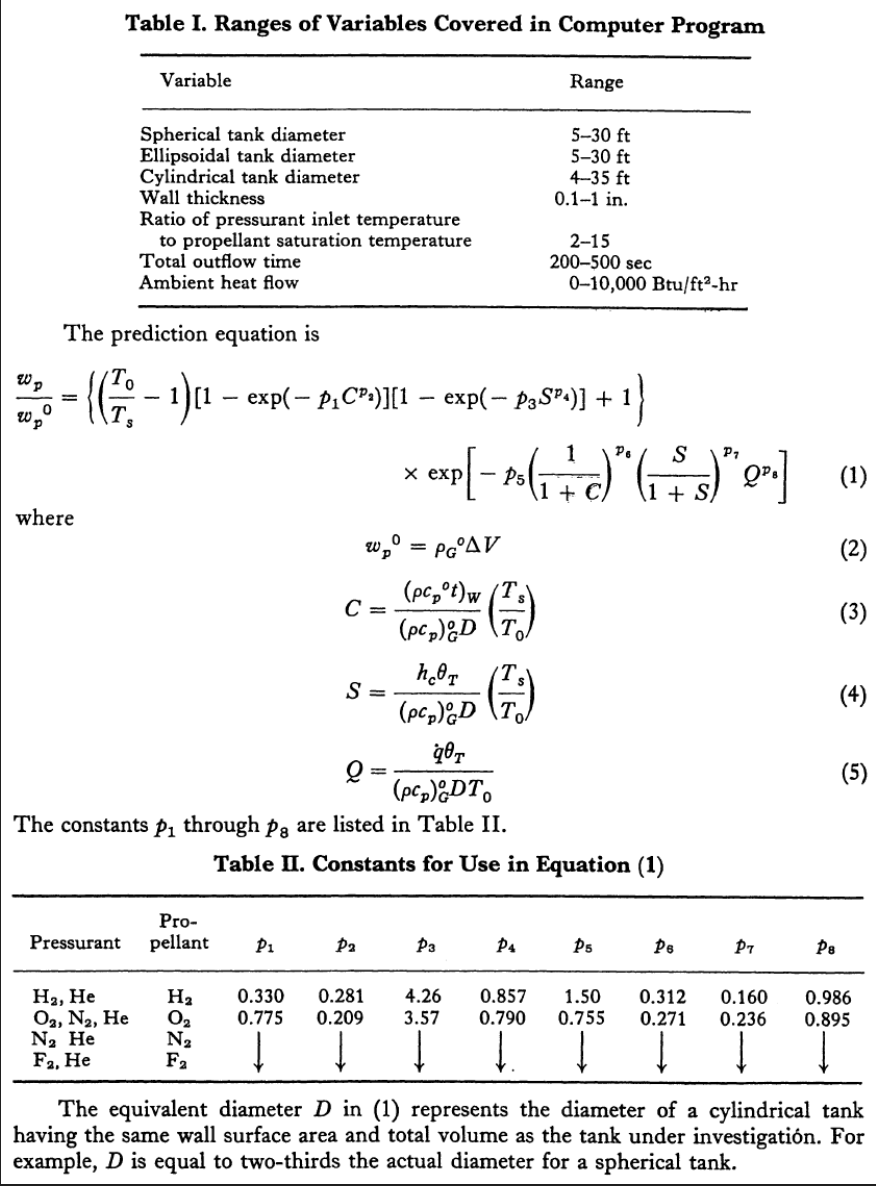

### Van Dresar [2] modified equations and comparison to test data:
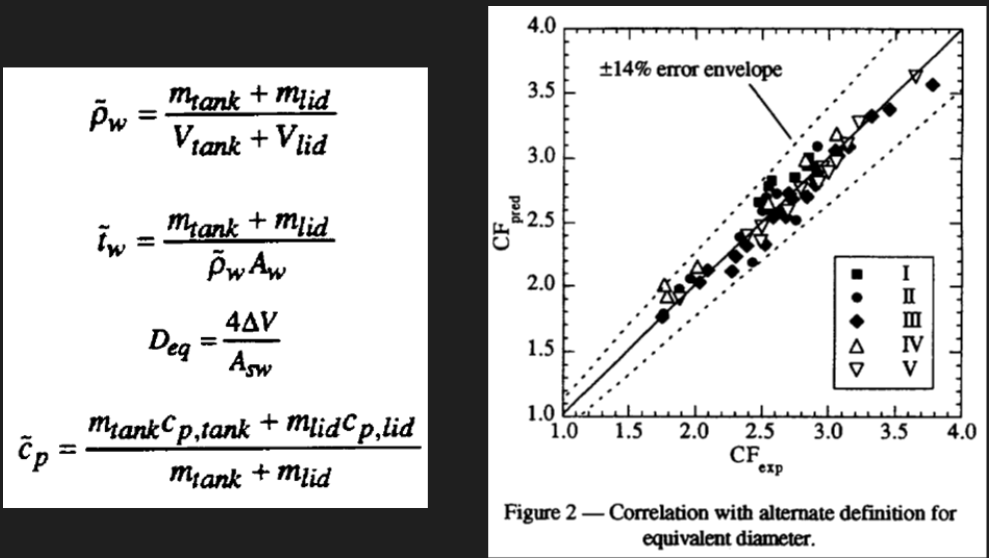

## General Notes
* Method assumes heat transfer between warm pressurant and cold walls at the initial saturation temperature of the fluid.
* Heat transfer between the pressurant and liquid interface is not modeled, therefore Van Dresar recommends not using for cases where interfacial mass transfer is greater than +/- 25% of the pressurant mass (e.g., sloshing, slush hydrogen, straight pipe injector)
* Epstein claimed less than 12% deviation between his model and test data from a large number of relatively small tank experimental data.
* Van Dresar made several adaptions to Epstein & Anderson to account for initially warm tank walls; different materials in the tank wall and lid; and to accommodate liquid residuals.
* Van Dresar applied the modified equations to 60 data points from 1.5 to 4.0 m diameter spheroidal tank expulsions of liquid hydrogen using hydrogen and helium pressurant. He reported predicted pressurant mass within 14% of the experimental data using Epstein's fitted constants.

### K-site 1.52 m Diameter Spherical Tank

In [1]:
import math

### TANK INPUTS ###

# Tank material properties, dims, and masses for NASA TN D-5336 tests
tank = 'Tank: Spherical, 1.52 m diameter, 6061-Al, 7.62 mm thick (K-site)'
cp_tank = 916.  # J/kg-K; 6061-T6 aluminum alloy at 271 K (NIST)
density_tank = 2720.  # kg/m^3; 6061 aluminum alloy
tank_diam = 1.52  # m, average tank inside diameter
thickness_tank = 7.62e-3  # m, average for wall

# Tank total surface area and mass estimate (assuming  all Al 6061)
sphere_area = 4 * math.pi * (tank_diam/2)**2  # m^2, surface area of a sphere
mass_wall = sphere_area * thickness_tank * density_tank

print("Estimated tank mass (without lid or viewing port):", "{:.3e}".format(
    mass_wall), "kg")

Estimated tank mass (without lid or viewing port): 1.504e+02 kg


### LH2 Expulsions, GH2 Pressurant, Hemisphere Diffuser (Stochl, NASA TN D-5336, 1969)

In [2]:
### TEST RUN INPUTS ###

# LH2 expulsions with GH2 pressurant and hemi diffuser (NASA TN D-5336, 1969)
description = 'Description: LH2 expulsions with GH2 pressurant and hemi \
diffuser (NASA TN D-5336, 1969)'
fluid = 'Parahydrogen'
gas = 'Hydrogen'
heat_leak = 732.  # W, environmental heat flux into tank wall
accel = 9.80665  # m/s^2, acceleration field
fill_end = 0.05  # volumetric fill fraction at end of expulsion
run = [14, 15, 17, 18, 20, 63, 64, 65, 67, 68, 71, 73, 74] # test run
temp_gas_in = [271.0, 266.0, 271.0, 278.0, 280.0, 333.0, 333.0, 333.0, 333.0, 
               333.0, 167.0, 167.0, 167.0]  # K, pressurant gas inlet temp
press_tank = [3.47E5, 3.470E+05, 3.490E+05, 3.490E+05, 3.480E+05, 3.520E+05, 
              3.470E+05, 3.470E+05, 3.470E+05, 3.470E+05, 3.470E+05, 3.470E+05, 
              3.470E+05]  # Pa; constant tank pressure during expulsion
vol_expel = [1.50, 1.45, 1.57, 1.56, 1.58, 1.59, 1.59, 1.58, 1.56, 1.58, 1.58, 
             1.57, 1.58]  # m^3, volume of liquid expelled
time_expel = [261.3, 295.0, 474.7, 204.1, 132.4, 531.9, 377.6, 354.5, 263.7, 
              149.0, 406.3, 288.9, 142.8]  # s, expulsion elapsed time
fill_start = [0.91, 0.88, 0.95, 0.95, 0.96, 0.96, 0.96, 0.96, 0.95, 0.96, 0.96, 
              0.95, 0.96]  # volumetric fill fraction at start of expulsion
mass_press_actual = [1.369, 1.382, 1.548, 1.271, 1.121, 1.565, 1.410, 1.354, 
                     1.285, 1.057, 1.705, 1.652, 1.426] # kg, experiment value

### Pressurant Mass Prediction (simplified algorithm; no lid adjustment)

In [3]:
import math
import CoolProp.CoolProp as cp

### CALCULATIONS ###

# Print tank and test run descriptions
print(tank)
print(description)
print("   Run    CF     Mass(kg)     Var(%)")
    
if fluid == 'Parahydrogen' or fluid == 'Hydrogen':  # H2 Epstein coefficients
    p1, p2, p3, p4, p5, p6, p7, p8 = .33, .281, 4.26, .857, 1.5, .312, .16, \
                                     .986
else: # Fitted coefficients for O2, N2, F2 from Epstein (good for CH4?)
    p1, p2, p3, p4, p5, p6, p7, p8 = .775, .209, 3.57, .790, .755, .271, .236,\
                                     .895

# Loop through each test run
test_runs = len(run)
for i in range(test_runs):
    
    # Pressurization gas and propellant liquid properties
    density_gas_0 = cp.PropsSI('Dmass', 'T', temp_gas_in[i], 'P', 
                               press_tank[i], gas)  # kg/m^3
    cp_gas_0 = cp.PropsSI('C', 'T', temp_gas_in[i], 'P', press_tank[i], gas)
                 # J/kg-K
    temp_sat = cp.PropsSI('T', 'Q', 0, 'P', press_tank[i], fluid)  # K
    
    # Ullage, warm wall, residuals. and equiv diameter adjustments
    area_swept = sphere_area * (fill_start[i] - fill_end)  # m^2, cold swept
    wall_volume = area_swept * thickness_tank  # m^3, thermally participating
    mass_wall = wall_volume * density_tank  # kg, residuals & warm wall exluded
    diam_equiv = 4 * vol_expel[i] / area_swept  # m, Van Dresar (NASA TM-105746)

    # Epstein and Anderson correlation parameters: C (wall-to-gas effective
    # thermal capacity ratio) and Q (ambient heat input to effective pressurant
    # thermal capacitance ratio)
    C = density_tank * cp_tank * thickness_tank / (density_gas_0 * cp_gas_0 * 
        diam_equiv) * temp_sat / temp_gas_in[i]
    Q = heat_leak / area_swept * time_expel[i] / (density_gas_0 * cp_gas_0 * 
                                               diam_equiv * temp_gas_in[i])

    # Turbulent free convection correlation: Nu = 0.021(GrPr)^(2/5)
    # where the heat transfer coeff is: h = kNu/L [Gebhart, 1970]
    temp_avg = (temp_gas_in[i] + temp_sat) / 2
    cte = cp.PropsSI('isobaric_expansion_coefficient', 'T', temp_avg, 'P', 
                 press_tank[i], gas) # 1/K
    visc_dyn = cp.PropsSI('V', 'T', temp_avg, 'P', press_tank[i], gas)  # Pa-s
    dens = cp.PropsSI('D', 'T', temp_avg, 'P', press_tank[i], gas)  # kg/m^3
    visc_kin = visc_dyn / dens # m^2/s
    cond = cp.PropsSI('conductivity', 'T', temp_avg, 'P', press_tank[i], gas)
             # W/m-K
    prandtl = cp.PropsSI('Prandtl', 'T', temp_avg, 'P', press_tank[i], gas)
    dim_char = area_swept / math.pi / diam_equiv / 2  # m, characteristic dim
        # assumed to be 1/2 of equivalent cylinder height based on swept volume
    grashoff = (accel * cte * abs(temp_gas_in[i] - temp_sat) * dim_char**3
                / visc_kin**2)
    nusselt = 0.021 * (grashoff * prandtl)**(2./5.)
    ht_coeff = cond * nusselt / dim_char

    # Epstein parameter S (modified Stanton number for gas-to-wall heat xfer) 
    S = ht_coeff * time_expel[i] / (density_gas_0 * cp_gas_0 * 
        diam_equiv) * temp_sat / temp_gas_in[i]
    
    # Pressurant mass prediction
    mass_press_0 = density_gas_0 * vol_expel[i]  # ideal adiabic pressurant mass
    collapse_factor = ((temp_gas_in[i] / temp_sat - 1) * (1 - math.exp(-p1 
                      * C**p2)) * (1 - math.exp(-p3 * S**p4)) + 1) * math.exp(
                      -p5 * (1 / (1 + C))**p6 * (S / (1 + S))**p7 * Q**p8)
    mass_press_est = collapse_factor * mass_press_0
    variance = (mass_press_est - mass_press_actual[i]) / mass_press_actual[i]\
                * 100 # % variance between predicted and actual pressurant mass

    # Results
    print("  ", "%3d" % (run[i]), " ", "{:.3f}".format(collapse_factor), " ", \
          "{:.3e}".format(mass_press_est),"  ", "{:.1f}".format(variance), "%")
    #print("  Run:", run[i], "-> Predicted CF and pressurant mass:", "{:.3f}".
    #      format(collapse_factor), "and", "{:.3e}".format(mass_press_est), \
    #      "kg", "-> Variance:", "{:.1f}".format(variance), "%")

Tank: Spherical, 1.52 m diameter, 6061-Al, 7.62 mm thick (K-site)
Description: LH2 expulsions with GH2 pressurant and hemi diffuser (NASA TN D-5336, 1969)
   Run    CF     Mass(kg)     Var(%)
    14   2.707   1.258e+00    -8.1 %
    15   2.722   1.246e+00    -9.9 %
    17   2.906   1.422e+00    -8.2 %
    18   2.623   1.243e+00    -2.2 %
    20   2.353   1.118e+00    -0.3 %
    63   3.380   1.375e+00    -12.2 %
    64   3.294   1.321e+00    -6.3 %
    65   3.273   1.304e+00    -3.7 %
    67   3.106   1.222e+00    -4.9 %
    68   2.675   1.066e+00    0.8 %
    71   2.127   1.689e+00    -0.9 %
    73   2.085   1.645e+00    -0.4 %
    74   1.886   1.498e+00    5.1 %
